In [ ]:
%cd '/content/drive/MyDrive/IDS-506/Prostrate Cancer Identification'

/content/drive/MyDrive/IDS-506/Prostrate Cancer Identification


In [ ]:
!ls

 Clean_Data.xlsx
'Copy of IDS-506 Prostate - Survival Analysis.ipynb'
'IDS-506 Prostate - Survival Analysis.ipynb'
'IDS-506 Prostate - Survival Analysis Submission.ipynb'
'IDS-506 Prostrate Cancer Identification.ipynb'
'(name)_score.csv'
 training_data_clean_1.csv
 training_data_clean.xlsx
 training_data.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
training_data = pd.read_csv('training_data.csv')

In [ ]:
training_data.head(5)

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
0,1,Jun-05,4.0,T1c,N0,M0,I,86.0,4.0,66.0,158.0,0.0,0.0,0.0,0.0,both,70.0,NaN,39.0,8.7,NaN,4.2,2.0,U03,0,0,1,1,0,1,1,1,0
1,2,Feb-06,8.0,T3a,N1,M0,IV,66.0,2.0,70.0,174.0,0.0,0.0,0.0,1.0,both,43.0,28.0,16.0,13.7,9.8,7.5,4.0,"U06,S07",1,1,1,0,0,0,1,1,0
2,3,Mar-06,9.0,T1a,N0,M0,IIB,84.0,4.0,69.0,NaN,0.0,0.0,0.0,0.0,right,51.0,NaN,89.0,16.0,15.9,18.5,0.0,"U01,U02,U03,S10",1,1,0,0,1,1,1,1,1
3,4,Feb-05,8.0,T2b,N0,M0,IIB,86.0,3.0,69.0,173.0,0.0,0.0,0.0,0.0,right,104.0,NaN,NaN,NaN,NaN,NaN,2.0,"U01,U02,S10,O11",0,0,0,1,0,1,1,0,0
4,5,Dec-01,8.0,T4,N0,M0,IV,78.0,4.0,70.0,201.0,1.0,1.0,0.0,0.0,left,72.0,NaN,87.0,18.1,NaN,NaN,2.0,"U01,U03,U05,S07",1,1,1,0,0,0,1,1,0


In [ ]:
training_data.isna().sum()[training_data.isna().sum()>0].sort_values(ascending = False)

tumor_6_months          10063
psa_6_months             9503
psa_1_year               2517
tumor_1_year             2123
smoker                   1586
tea                      1586
previous_cancer          1586
first_degree_history     1586
family_history           1586
psa_diagnosis            1398
height                   1364
weight                   1317
age                       748
symptoms                  410
gleason_score             320
tumor_diagnosis           303
race                      165
dtype: int64

In [ ]:
training_data['stage'].unique()

array(['I', 'IV', 'IIB', 'IIA', 'III'], dtype=object)

In [ ]:
tranform_stage = {'stage': {'I':1, 'IV':5, 'IIB':3, 'IIA':2, 'III':4}}

In [ ]:
training_data = training_data.replace(tranform_stage)

In [ ]:
training_data['stage'].unique()

array([1, 5, 3, 2, 4])

In [ ]:
training_data = training_data.drop(['t_score', 'n_score', 'm_score'],axis=1)

In [ ]:
training_data.shape

(15385, 30)

In [ ]:
training_data['O01']=training_data['symptoms'].str.contains('O01')
training_data['O08']=training_data['symptoms'].str.contains('O08')
training_data['O09']=training_data['symptoms'].str.contains('O09')
training_data['O10']=training_data['symptoms'].str.contains('O10')
training_data['O11']=training_data['symptoms'].str.contains('O11')
training_data['P01']=training_data['symptoms'].str.contains('P01')
training_data['P02']=training_data['symptoms'].str.contains('P02')
training_data['P03']=training_data['symptoms'].str.contains('P03')
training_data['S04']=training_data['symptoms'].str.contains('S04')
training_data['S07']=training_data['symptoms'].str.contains('S07')
training_data['S10']=training_data['symptoms'].str.contains('S10')
training_data['U01']=training_data['symptoms'].str.contains('U01')
training_data['U02']=training_data['symptoms'].str.contains('U02')
training_data['U03']=training_data['symptoms'].str.contains('U03')
training_data['U05']=training_data['symptoms'].str.contains('U05')
training_data['U06']=training_data['symptoms'].str.contains('U06')

In [ ]:
tranform_symptoms = {'O01' : {True : 1, False : 0}, 
                     'O08' : {True : 1, False : 0},
                     'O09' : {True : 1, False : 0},
                     'O10' : {True : 1, False : 0},
                     'O11' : {True : 1, False : 0},
                     'P01' : {True : 1, False : 0},
                     'P02' : {True : 1, False : 0},
                     'P03' : {True : 1, False : 0},
                     'S04' : {True : 1, False : 0},
                     'S07' : {True : 1, False : 0},
                     'S10' : {True : 1, False : 0},
                     'U01' : {True : 1, False : 0},
                     'U02' : {True : 1, False : 0},
                     'U03' : {True : 1, False : 0},
                     'U05' : {True : 1, False : 0},
                     'U06' : {True : 1, False : 0}
                     }

In [ ]:
training_data = training_data.replace(tranform_symptoms)

In [ ]:
training_data.drop('symptoms', axis=1, inplace=True)

In [ ]:
training_data.shape

(15385, 45)

In [ ]:
training_data.head(5)

,id,diagnosis_date,gleason_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O08,O09,O10,O11,P01,P02,P03,S04,S07,S10,U01,U02,U03,U05,U06
0,1,Jun-05,4.0,1,86.0,4.0,66.0,158.0,0.0,0.0,0.0,0.0,both,70.0,NaN,39.0,8.7,NaN,4.2,2.0,0,0,1,1,0,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,Feb-06,8.0,5,66.0,2.0,70.0,174.0,0.0,0.0,0.0,1.0,both,43.0,28.0,16.0,13.7,9.8,7.5,4.0,1,1,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,Mar-06,9.0,3,84.0,4.0,69.0,NaN,0.0,0.0,0.0,0.0,right,51.0,NaN,89.0,16.0,15.9,18.5,0.0,1,1,0,0,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,4,Feb-05,8.0,3,86.0,3.0,69.0,173.0,0.0,0.0,0.0,0.0,right,104.0,NaN,NaN,NaN,NaN,NaN,2.0,0,0,0,1,0,1,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,5,Dec-01,8.0,5,78.0,4.0,70.0,201.0,1.0,1.0,0.0,0.0,left,72.0,NaN,87.0,18.1,NaN,NaN,2.0,1,1,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
training_data = pd.get_dummies(training_data, columns=['race'])

In [ ]:
training_data.head(5)

,id,diagnosis_date,gleason_score,stage,age,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,O01,O08,O09,O10,O11,P01,P02,P03,S04,S07,S10,U01,U02,U03,U05,U06,race_1.0,race_2.0,race_3.0,race_4.0
0,1,Jun-05,4.0,1,86.0,66.0,158.0,0.0,0.0,0.0,0.0,both,70.0,NaN,39.0,8.7,NaN,4.2,2.0,0,0,1,1,0,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
1,2,Feb-06,8.0,5,66.0,70.0,174.0,0.0,0.0,0.0,1.0,both,43.0,28.0,16.0,13.7,9.8,7.5,4.0,1,1,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0
2,3,Mar-06,9.0,3,84.0,69.0,NaN,0.0,0.0,0.0,0.0,right,51.0,NaN,89.0,16.0,15.9,18.5,0.0,1,1,0,0,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,0,1
3,4,Feb-05,8.0,3,86.0,69.0,173.0,0.0,0.0,0.0,0.0,right,104.0,NaN,NaN,NaN,NaN,NaN,2.0,0,0,0,1,0,1,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,1,0
4,5,Dec-01,8.0,5,78.0,70.0,201.0,1.0,1.0,0.0,0.0,left,72.0,NaN,87.0,18.1,NaN,NaN,2.0,1,1,1,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0,1


In [ ]:
#training_data.to_excel('training_data_clean.xlsx')

In [ ]:
training_data_1 = pd.read_csv('training_data_clean_1.csv')

In [ ]:
#Creating 3 different dataframes for logistic regression at three different time periods, t=0, t=6 months and t= 1 year

X_0 = training_data_1[['gleason_score', 'stage', 'age', 'height', 'weight', 'family_history', 'first_degree_history', 'previous_cancer', 'smoker', 'tumor_diagnosis', 'psa_diagnosis', 'tea', 'rd_thrpy', 'h_thrpy', 'chm_thrpy', 'cry_thrpy', 
                       'brch_thrpy', 'rad_rem', 'multi_thrpy', 'O01', 'O08', 'O09', 'O10', 'O11', 'P01', 'P02', 'P03', 'S04', 'S07', 'S10', 'U01', 'U02', 'U03', 'U05', 'U06', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0']]
y_0 = training_data_1['survival_7_years']

X_1 = training_data_1[['gleason_score', 'stage', 'age', 'height', 'weight', 'family_history', 'first_degree_history', 'previous_cancer', 'smoker', 'tumor_6_months', 'psa_6_months', 'tea', 'rd_thrpy', 'h_thrpy', 'chm_thrpy',
                       'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy', 'O01', 'O08', 'O09', 'O10', 'O11', 'P01', 'P02', 'P03', 'S04', 'S07', 'S10', 'U01', 'U02', 'U03', 'U05', 'U06', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0']]
y_1 = training_data_1['survival_7_years']

X_2 = training_data_1[['gleason_score', 'stage', 'age', 'height', 'weight', 'family_history', 'first_degree_history', 'previous_cancer', 'smoker', 'tumor_1_year', 'psa_1_year', 'tea', 'rd_thrpy', 'h_thrpy', 'chm_thrpy',
                       'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy', 'O01', 'O08', 'O09', 'O10', 'O11', 'P01', 'P02', 'P03', 'S04', 'S07', 'S10', 'U01', 'U02', 'U03', 'U05', 'U06', 'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0']]
y_2 = training_data_1['survival_7_years']

In [ ]:
#Dropping NAs for respective datasets
X_0 = X_0.dropna()
y_0 = y_0.iloc[X_0.index]

X_1 = X_1.dropna()
y_1 = y_1.iloc[X_1.index]

X_2 = X_2.dropna()
y_2 = y_2.iloc[X_2.index]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.2, random_state=42)
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = log_model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69      1035
           1       0.58      0.41      0.48       822

    accuracy                           0.61      1857
   macro avg       0.60      0.59      0.59      1857
weighted avg       0.61      0.61      0.60      1857



In [ ]:
print(confusion_matrix(y_test,predictions))

[[794 241]
 [483 339]]


In [ ]:
np.exp(log_model.coef_).shape

(1, 39)

In [ ]:
np.exp(log_model.coef_)

array([[0.87885789, 0.78540531, 1.00009774, 1.04398125, 0.99577974,
        0.98593442, 0.94747652, 0.96180191, 1.23088662, 0.99383839,
        0.9900641 , 0.96997192, 0.69347482, 1.25838391, 1.01537729,
        0.93581407, 0.86144225, 0.9021196 , 0.87629274, 0.76198548,
        0.44963111, 0.37936081, 0.87761926, 1.13267586, 0.46798481,
        0.37396677, 0.490846  , 1.07447956, 1.05826409, 0.52444442,
        1.00725933, 1.05649629, 1.00297145, 0.66418301, 1.06422415,
        0.77845023, 1.06681026, 1.02179692, 1.0267565 ]])

In [ ]:
np.arange(0,39)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

In [ ]:
Columns = pd.DataFrame(X_0.columns)
coeffecients = pd.DataFrame(np.exp(log_model.coef_).reshape(39,1))
odds_ratio = pd.concat([Columns,coeffecients],axis=1)
print(odds_ratio)

                       0         0
0          gleason_score  0.878858
1                  stage  0.785405
2                    age  1.000098
3                 height  1.043981
4                 weight  0.995780
5         family_history  0.985934
6   first_degree_history  0.947477
7        previous_cancer  0.961802
8                 smoker  1.230887
9        tumor_diagnosis  0.993838
10         psa_diagnosis  0.990064
11                   tea  0.969972
12              rd_thrpy  0.693475
13               h_thrpy  1.258384
14             chm_thrpy  1.015377
15             cry_thrpy  0.935814
16            brch_thrpy  0.861442
17               rad_rem  0.902120
18           multi_thrpy  0.876293
19                   O01  0.761985
20                   O08  0.449631
21                   O09  0.379361
22                   O10  0.877619
23                   O11  1.132676
24                   P01  0.467985
25                   P02  0.373967
26                   P03  0.490846
27                  

In [ ]:
#t=6 months
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = log_model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       517
           1       0.55      0.32      0.40       312

    accuracy                           0.65       829
   macro avg       0.61      0.58      0.58       829
weighted avg       0.63      0.65      0.62       829



In [ ]:
print(confusion_matrix(y_test,predictions))

[[437  80]
 [213  99]]


In [ ]:
Columns = pd.DataFrame(X_1.columns)
coeffecients = pd.DataFrame(np.exp(log_model.coef_).reshape(39,1))
odds_ratio = pd.concat([Columns,coeffecients],axis=1)
print(odds_ratio)

                       0         0
0          gleason_score  0.948034
1                  stage  0.779225
2                    age  0.998959
3                 height  1.043201
4                 weight  0.994791
5         family_history  0.985569
6   first_degree_history  0.942193
7        previous_cancer  0.834588
8                 smoker  1.337849
9         tumor_6_months  0.990043
10          psa_6_months  0.963581
11                   tea  0.983514
12              rd_thrpy  0.791503
13               h_thrpy  1.275550
14             chm_thrpy  0.995765
15             cry_thrpy  0.830029
16            brch_thrpy  0.967656
17               rad_rem  0.907272
18           multi_thrpy  0.718686
19                   O01  1.034065
20                   O08  0.399972
21                   O09  0.474068
22                   O10  0.937208
23                   O11  1.062522
24                   P01  0.298008
25                   P02  0.466383
26                   P03  0.716510
27                  

In [ ]:
#t=1 year
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = log_model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1095
           1       0.61      0.49      0.54       785

    accuracy                           0.65      1880
   macro avg       0.64      0.63      0.63      1880
weighted avg       0.65      0.65      0.65      1880



In [ ]:
print(confusion_matrix(y_test,predictions))

[[846 249]
 [403 382]]


In [ ]:
Columns = pd.DataFrame(X_2.columns)
coeffecients = pd.DataFrame(np.exp(log_model.coef_).reshape(39,1))
odds_ratio = pd.concat([Columns,coeffecients],axis=1)
print(odds_ratio)

                       0         0
0          gleason_score  0.909606
1                  stage  0.802313
2                    age  1.001154
3                 height  1.036747
4                 weight  0.996591
5         family_history  1.058453
6   first_degree_history  0.935572
7        previous_cancer  0.987842
8                 smoker  1.123575
9           tumor_1_year  0.992161
10            psa_1_year  0.992991
11                   tea  0.975422
12              rd_thrpy  0.698252
13               h_thrpy  1.172697
14             chm_thrpy  0.986993
15             cry_thrpy  0.938269
16            brch_thrpy  0.874851
17               rad_rem  0.858601
18           multi_thrpy  0.894466
19                   O01  0.730338
20                   O08  0.615076
21                   O09  0.444223
22                   O10  1.433118
23                   O11  1.028107
24                   P01  0.428078
25                   P02  0.401007
26                   P03  0.401923
27                  

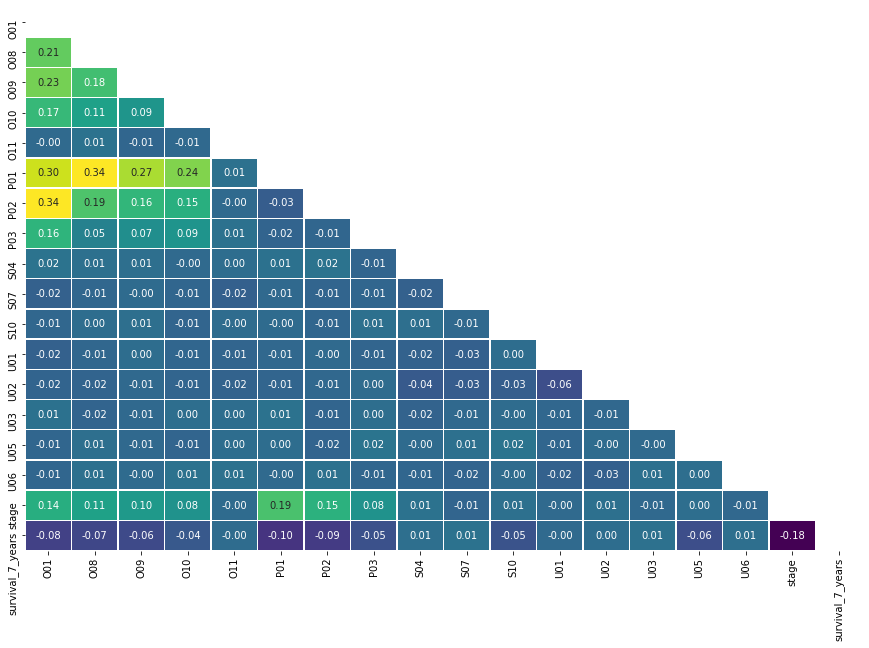

In [ ]:
#df_symptoms = df[['O01', 'O08', 'O09', 'O10', 'O11', 'P01', 'P02', 'P03', 'S04', 'S07', 'S10', 'U01', 'U02', 'U03', 'U05', 'U06', 'stage','survival_7_years']]
#mask = np.zeros_like(df_symptoms.corr())
#mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots(figsize=(15,10))
#sns.heatmap(df_symptoms.corr(),annot= True, ax=ax,mask=mask, linewidths=0.5, fmt=".2f", cmap='viridis', cbar=False)

#fig, ax = plt.subplots(figsize=(20,15))
#sns.heatmap(.corr(), ax=ax, cmap='viridis', annot=True, fmt=".2f", linewidths=0.25)

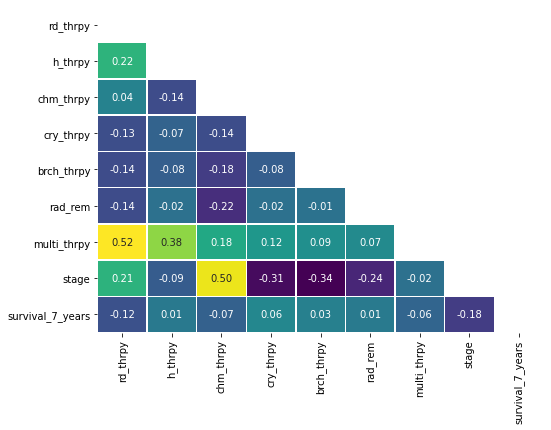

In [ ]:
#df_therapy = df[['rd_thrpy',	'h_thrpy',	'chm_thrpy',	'cry_thrpy',	'brch_thrpy', 'rad_rem',	'multi_thrpy','stage','survival_7_years']]
#mask = np.zeros_like(df_therapy.corr())
#mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots(figsize=(8,6))
#sns.heatmap(df_therapy.corr(),annot= True, ax=ax,mask=mask, linewidths=0.5, fmt=".2f", cmap='viridis', cbar=False)

#fig, ax = plt.subplots(figsize=(15,10))
#sns.heatmap(.corr(), ax=ax, cmap='viridis', annot=True, fmt=".2f", linewidths=0.25)